### Objective

- Learn how to implement k-means on a real-world dataset (Socio-economic data by country)
- Use k-means to cluster/segment data
- Visualize the clusters

In [1]:
# Importing important libraries
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Importing data and transforming using PCA
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")

# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))


# Removing the outliers

country_data_outliers_removed = country_data[(z<3).all(axis=1)]


X = country_data_outliers_removed.drop('country',axis =1)
y = country_data_outliers_removed['country']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

pca_final = PCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_scaled)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532  1.138280  0.279088  0.082455  0.808245   0.157336   
1      0.538949  0.479658  0.097016  0.070837  0.375369   0.312347   
2      0.272833  0.099122  0.966073  0.641762  0.220844   0.789274   
3      2.007808  0.775381  1.448071  0.165315  0.585043   1.387054   
4      0.695634  0.160668  0.286894  0.497568  0.101732   0.601749   
..          ...       ...       ...       ...       ...        ...   
162    0.225578  0.200917  0.571711  0.240700  0.738527   0.489784   
163    0.526514  0.461363  0.695862  1.213499  0.033542   3.616865   
164    0.372315  1.130305  0.008877  1.380030  0.658404   0.409732   
165    0.448417  0.406478  0.597272  0.517472  0.658924   1.500916   
166    1.114951  0.150348  0.338015  0.662477  0.721358   0.590015   

     life_expec  total_fer      gdpp  
0      1.619092   1.902882  0.679180  
1      0.647866   0.859973  0.485623  
2      0.670423   0.038404  0.465376  
3  

In [3]:
X_pca_final

array([[-3.13080623e+00, -4.71116635e-01,  1.33627369e+00,
         6.41322074e-01],
       [ 5.51781057e-01, -2.30631502e-01, -7.12343377e-02,
        -1.37703623e+00],
       [-3.56256970e-01, -5.42353969e-01, -1.81815917e+00,
        -2.16783079e-01],
       [-3.45432284e+00,  1.11447049e+00, -1.55398611e+00,
         2.16845710e+00],
       [ 1.30895672e+00,  6.12032735e-01, -6.52868093e-02,
        -6.87559139e-01],
       [ 1.63504490e-01, -2.08440417e+00, -1.25409486e+00,
         2.08594880e-01],
       [-1.36309667e-01, -4.19282341e-01, -7.49082518e-01,
        -1.48812166e+00],
       [ 3.33525876e+00, -2.43819201e+00,  3.79190352e-01,
         1.27992998e+00],
       [ 3.94908129e+00, -4.78883220e-01,  8.80088784e-01,
         1.46475197e+00],
       [-1.43114312e-01, -4.22884350e-01, -1.43331258e+00,
         2.07409260e-01],
       [ 1.80098115e+00, -5.18925051e-01,  6.24775714e-01,
         5.87294120e-03],
       [ 2.12026608e+00,  8.55676701e-01, -1.36767832e+00,
      

## Clustering

In [4]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=123)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5, random_state=123)

In [6]:
# Print k-means labels
kmeans.labels_

array([3, 1, 0, 3, 1, 0, 0, 2, 2, 0, 2, 4, 0, 1, 1, 4, 1, 3, 1, 0, 1, 3,
       0, 1, 3, 3, 1, 3, 2, 1, 3, 3, 0, 0, 0, 3, 3, 3, 1, 3, 1, 4, 4, 2,
       0, 0, 0, 1, 3, 3, 4, 1, 2, 2, 0, 3, 1, 2, 3, 2, 1, 0, 3, 3, 1, 4,
       2, 0, 0, 0, 0, 4, 2, 2, 0, 2, 1, 0, 3, 3, 1, 3, 1, 1, 3, 3, 0, 4,
       1, 3, 3, 4, 4, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 3, 0, 2, 2, 4, 3, 4,
       1, 0, 0, 1, 2, 1, 0, 3, 1, 0, 3, 1, 4, 4, 4, 1, 3, 4, 2, 0, 1, 3,
       1, 2, 3, 3, 1, 3, 3, 1, 1, 0, 1, 3, 1, 4, 2, 0, 0, 1, 1, 3, 3],
      dtype=int32)

Finding the Optimal Number of Clusters

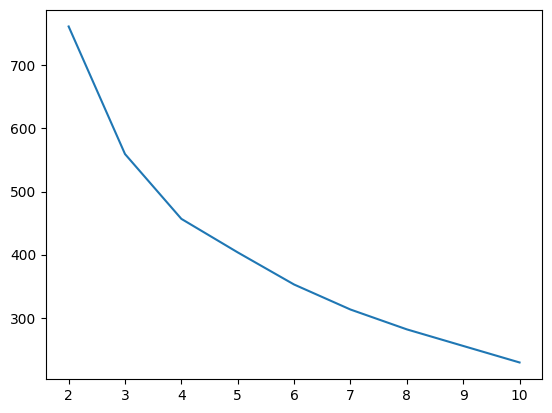

In [7]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=123)
    kmeans.fit(X_pca_final)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters, ssd)

##### From the elbow method we can say that k = 3 clusters seems to be a good choice

In [8]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.31843272115402227
For n_clusters=3, the silhouette score is 0.32179556869150555
For n_clusters=4, the silhouette score is 0.30542162232977776
For n_clusters=5, the silhouette score is 0.2893643201242979
For n_clusters=6, the silhouette score is 0.30438724715472204
For n_clusters=7, the silhouette score is 0.29011251771801044
For n_clusters=8, the silhouette score is 0.2919418072019358
For n_clusters=9, the silhouette score is 0.30109008217422545
For n_clusters=10, the silhouette score is 0.29283722315340904


In [9]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=123)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=3, random_state=123)

In [10]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_


In [11]:
X_pca_final_df

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID
0,-3.130806,-0.471117,1.336274,0.641322,1
1,0.551781,-0.230632,-0.071234,-1.377036,0
2,-0.356257,-0.542354,-1.818159,-0.216783,0
3,-3.454323,1.114470,-1.553986,2.168457,1
4,1.308957,0.612033,-0.065287,-0.687559,0
...,...,...,...,...,...
148,-1.018529,-0.731559,-1.161339,-0.476265,0
149,-0.891335,0.907202,0.189163,-0.635586,0
150,0.331876,2.386196,-0.572829,-0.650777,0
151,-2.233628,-0.522003,-1.400054,0.649399,1


In [12]:
X_pca_final_df['K_Means_Cluster_ID'][0:30]

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     2
8     2
9     0
10    2
11    2
12    0
13    0
14    0
15    2
16    0
17    1
18    0
19    0
20    0
21    1
22    0
23    0
24    1
25    1
26    0
27    1
28    2
29    0
Name: K_Means_Cluster_ID, dtype: int32

<Axes: xlabel='PC1', ylabel='PC2'>

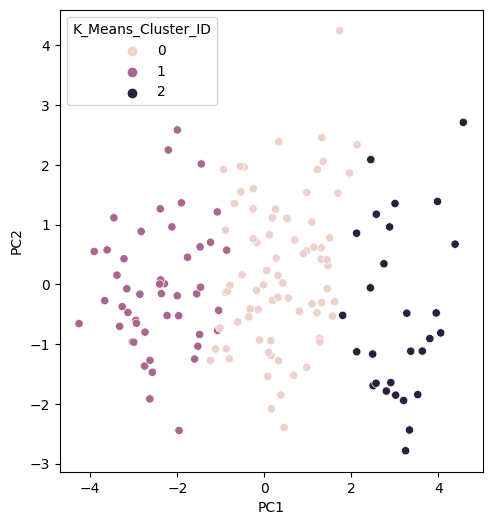

In [13]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')